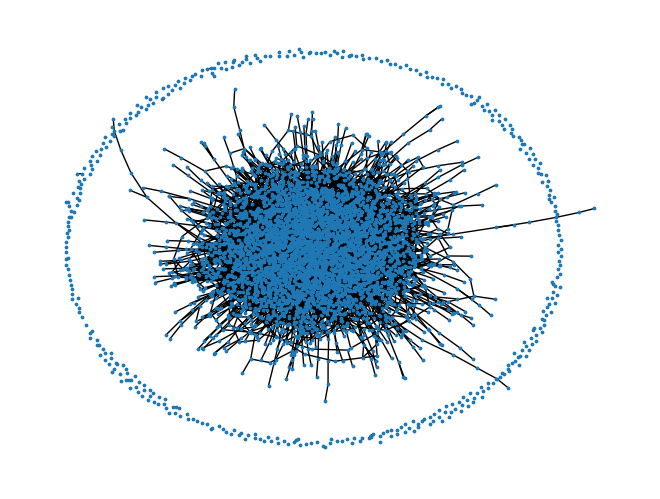

In [10]:
import networkx as nx
n = 4941
p = 0.00054
G = nx.erdos_renyi_graph(n, p)
nx.draw(G, node_size= 3)

In [5]:
def cascade_failure(G0, failed_nodes0):
    G = G0.copy()
    failed_nodes = failed_nodes0.copy()
    for n in failed_nodes:
        # mark node as failed
        if not G.nodes[n]["failed"]:
            G.nodes[n]["failed"] = True
        
        neighbors = list(G.neighbors(n))
        for neighbor in neighbors:
            if G.nodes[neighbor]["failed"]:
                neighbors.remove(neighbor)
        
        load = G.nodes[n]["load"]

        if neighbors:
            load_per_neighbor = load / len(neighbors) # distribute load equally among neighbors
            for neighbor in neighbors:
                if not G.nodes[neighbor]["failed"]:
                    G.nodes[neighbor]["load"] += load_per_neighbor
                    if G.nodes[neighbor]["load"] > G.nodes[neighbor]["capacity"]:
                        failed_nodes.append(neighbor)
    return G

In [8]:
from atack import random_node_attack

In [12]:
random_node_attack(G, 4)
cascade_failure(G, random_node_attack(G, 4))

KeyError: 'failed'